In [21]:
import sys
sys.path.append("../")

import random
from queue import Queue

from pprint import pprint
from Core.maze import Maze, INF

In [22]:
def BinaryTree(maze, min_value):
    flag = 0
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            temp = []
            if x > 0:
                temp.append('W')
            if y > 0:
                temp.append('N')
            if len(temp) == 0:
                continue
            direction = random.randint(0, len(temp)-1)
            maze.add_path((x, y), temp[direction], random.randint(min_value, 10))

In [23]:
def bfs(maze, source, sink):
    # setup
    n_rows = len(maze.grid)
    n_cols = len(maze.grid[0])
    visited = [[False]*n_cols for i in range(n_rows)]
    queue = Queue()
    parents = [[(-1, -1)]*n_cols for i in range(n_rows)]
    bottleneck = INF

    # initialization
    queue.put(source)
    
    # starting
    while not queue.empty():
        x, y = queue.get()
        current_node = maze.grid[x][y]
        
        # exit condition
        if (x, y) == sink:
            return True, parents, bottleneck

        # visited condition
        if visited[x][y]:
            continue
        # visiting the node
        visited[x][y] = True
        
        # going over the valid children nodes that can be accessed
        # through the edge
        if maze.grid[x][y].neighbors['N'] != INF and not visited[x-1][y]:
            queue.put((x-1, y))
            parents[x-1][y] = (x, y)
            bottleneck = min(bottleneck, maze.grid[x][y].neighbors['N'])

        if maze.grid[x][y].neighbors['S'] != INF and not visited[x+1][y]:
            queue.put((x+1, y))
            parents[x+1][y] = (x, y)
            bottleneck = min(bottleneck, maze.grid[x][y].neighbors['S'])

        if maze.grid[x][y].neighbors['W'] != INF and not visited[x][y-1]:
            queue.put((x, y-1))
            parents[x][y-1] = (x, y)
            bottleneck = min(bottleneck, maze.grid[x][y].neighbors['W'])

        if maze.grid[x][y].neighbors['E'] != INF and not visited[x][y+1]:
            queue.put((x, y+1))
            parents[x][y+1] = (x, y)
            bottleneck = min(bottleneck, maze.grid[x][y].neighbors['E'])

    
    return False, [], -1

In [24]:
def determine_direction(current_node, previous_node):
        """
        returns direction of path from previous node leading to current node
        """
        difference = (current_node[0]-previous_node[0], current_node[1]-previous_node[1])
        if difference == (1, 0):
            return 'N', 'S'
        if difference == (-1, 0):
            return 'S', 'N'
        if difference == (0, 1):
            return 'E', 'W'
        if difference == (0, -1):
            return 'W', 'E'

In [25]:
def augment_flows(maze, parents, source, sink, flow_possible):
    current_node = sink
    while current_node != source:
        previous_node = parents[current_node[0]][current_node[1]]
        direction, reverse_direction = determine_direction(current_node, previous_node)

        maze.grid[current_node[0]][current_node[1]].neighbors[reverse_direction] += flow_possible
        maze.grid[previous_node[0]][previous_node[1]].neighbors[direction] -= flow_possible
        
        current_node = previous_node
    return

In [26]:
def EdmondsKarp(maze, source, sink):
    flow = 0
    result, parents, flow_possible = bfs(maze, source, sink)
    
    while result and flow_possible:
        flow += flow_possible
        augment_flows(maze, parents, source, sink, flow_possible)
        result, parents, flow_possible = bfs(maze, source, sink)
    return flow

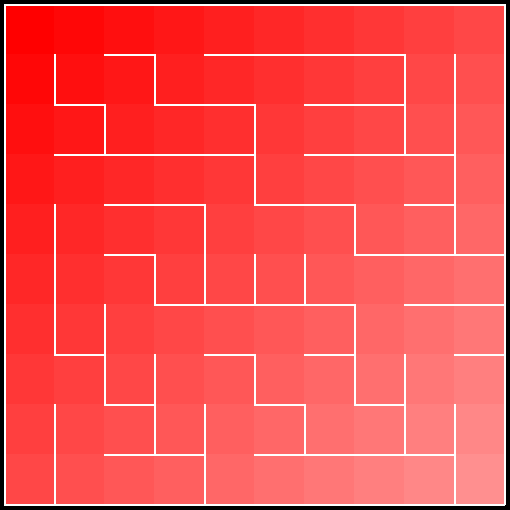

Max Flow is:  8


In [31]:
N = int(input("Enter N (dimension): ").strip())
maze = Maze(N,N)
BinaryTree(maze, random.randint(4, 24))
maze.add_colors()
display(maze.draw())

source = (0, 0)
sink = (N-1, N-1)

print("Max Flow is: ", EdmondsKarp(maze, source, sink))